<a href="https://colab.research.google.com/github/kavita2776/pytorch1/blob/main/DrowsinessDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import cv2 as cv
import os
from keras.models import load_model
import time
from google.colab.patches import cv2_imshow
import numpy as np
import cv2

In [17]:
face = cv.CascadeClassifier('/content/sample_data/haarcascade_frontalface_alt.xml')
leye = cv.CascadeClassifier('/content/sample_data/haarcascade_lefteye_2splits.xml')
reye = cv.CascadeClassifier('/content/haarcascade_righteye_2splits.xml')

In [18]:
lbl=['Close','Open']

model = load_model('/content/cnnCat2.h5')
path =os.getcwd()
font=cv.FONT_HERSHEY_COMPLEX_SMALL
count=0
score=0
thicc=2
rpred=[99]
lpred=[99]

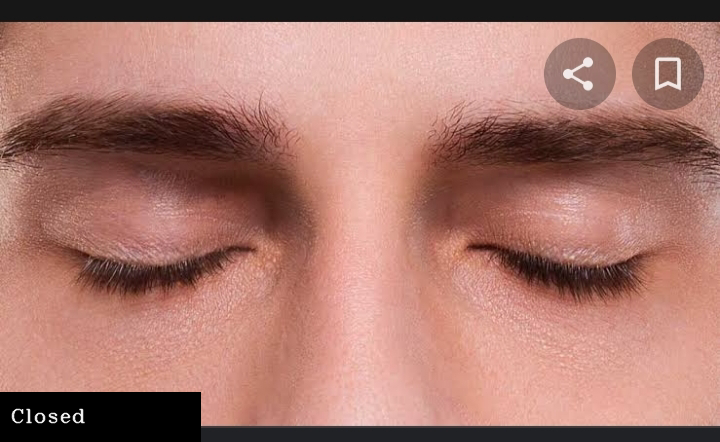

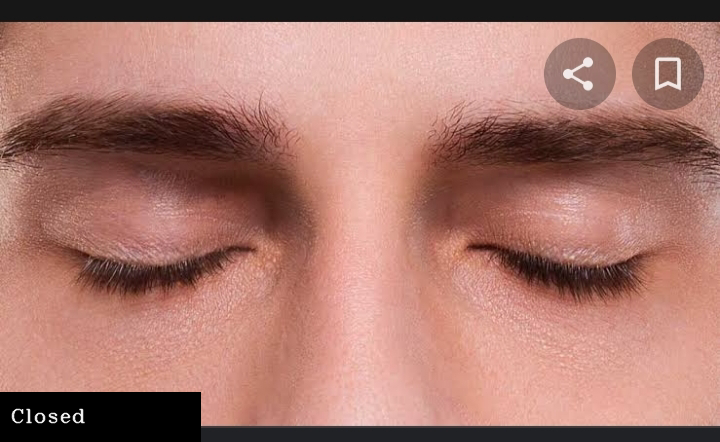

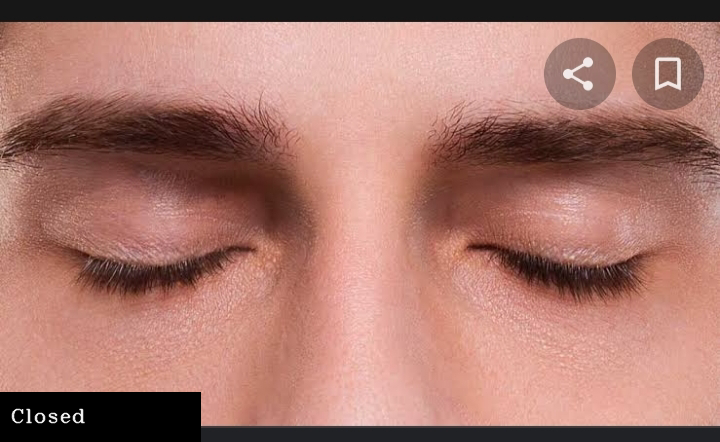

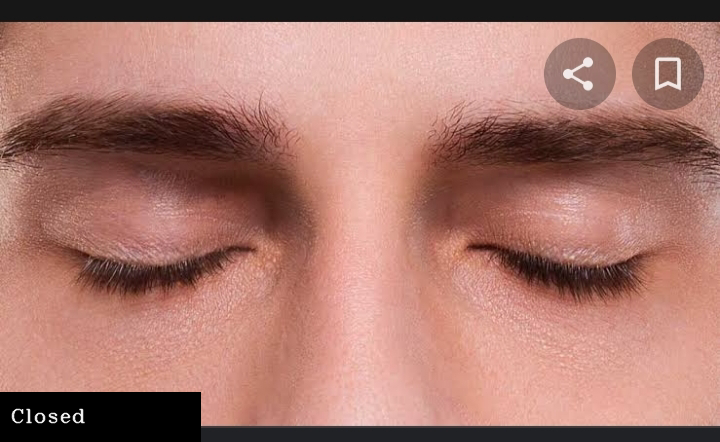

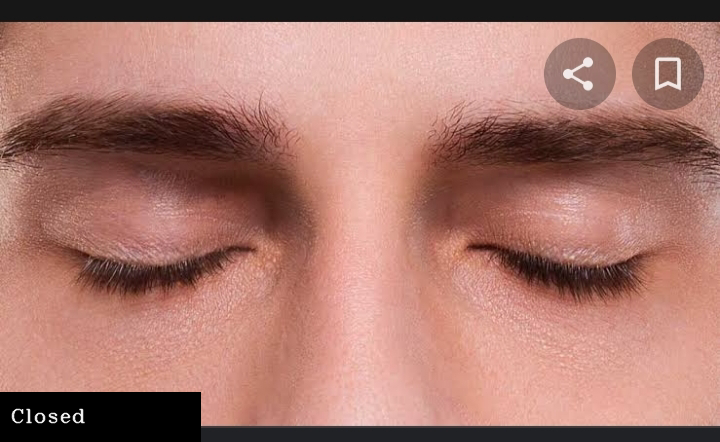

In [21]:
cnt=0
while cnt<5:
    cap=cv.VideoCapture("/content/closed eye.jpg")
    ret, frame = cap.read()
    height, width = frame.shape[:2]

    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

    faces = face.detectMultiScale(gray,minNeighbors=5,scaleFactor=1.1,minSize=(25,25))
    left_eye = leye.detectMultiScale(gray)
    right_eye = reye.detectMultiScale(gray)

    cv.rectangle(frame, (0,height-50), (200,height), (0,0,0), thickness=cv.FILLED )
  
    for (x,y,w,h) in faces:
        cv.rectangle(frame, (x,y) , (x+w,y+h), (100,100,100,) , 1)

    for (x,y,w,h) in right_eye:
        r_eye=frame[y:y+h,x:x+w]
        count=count+1
        r_eye = cv.cvtColor(r_eye,cv.COLOR_BGR2GRAY)
        r_eye =cv.resize(r_eye,(24,24))
        r_eye = r_eye/255
        r_eye = r_eye.reshape(24,24,-1)
        r_eye = np.expand_dims(r_eye,axis=0)
        rpred = model.predict(r_eye)
        if(rpred[0][1]==1):
            lbl='Open'
        if(rpred[0][1]==0):
            lbl='Close'
        break

    for (x,y,w,h) in left_eye:
        l_eye=frame[y:y+h,x:x+w]
        count=count+1
        l_eye = cv.cvtColor(l_eye,cv.COLOR_BGR2GRAY)
        l_eye =cv.resize(l_eye,(24,24))
        l_eye = l_eye/255
        l_eye = l_eye.reshape(24,24,-1)
        l_eye = np.expand_dims(l_eye,axis=0)
        lpred = model.predict(l_eye)
        if(lpred[0][1]==1):
            lbl='Open'
        if(lpred[0][1]==0):
            lbl='Closed'
        break

    if(rpred[0][1]>=0.9 and lpred[0][1]>=0.9):
        score=score-1
        cv.putText(frame,"Open",(10,height-20), font, 1, (255,255,255),1,cv.LINE_AA)
    else:
       cv.putText(frame,"Closed",(10,height-20), font, 1,(255,255,255),1,cv.LINE_AA)

    if(score<0):
      score=0

    if(score>15):
        cv.imwrite(os.path.join(path,'image.jpg'),frame)
        if(thicc<16):
           thicc=thicc+2
        else:
            thicc=thicc-2
            if(thicc<2):
                thicc=2
        cv.rectangle(frame, (0,0), (width,height),(0,0,255),thicc)
    cv2_imshow(frame)
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
    cnt=cnt+1

cap.release()
cv.destroyAllWindows()
            

    